In [ ]:
#I am putting My datasete in Google drive, so i will import it Use here in google colab
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
# Allowing acesss to the files by the use of drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# Define paths for my dataset
train_dir = '/content/drive/MyDrive/Coriander vs Parsley/train'
test_dir = '/content/drive/MyDrive/Coriander vs Parsley/test'

In [ ]:
import os
print(len(os.listdir('/content/drive/MyDrive/Coriander vs Parsley/train/coriander')))
print(len(os.listdir('/content/drive/MyDrive/Coriander vs Parsley/train/parsley')))
print(len(os.listdir('/content/drive/MyDrive/Coriander vs Parsley/test/coriander')))
print(len(os.listdir('/content/drive/MyDrive/Coriander vs Parsley/test/parsley')))

121
74
29
22


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Createing ImageDataGenerator for my training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Spliting  images for validation
)

# Loading and prepareing my training data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=16,
    class_mode='binary',  # 'binary' for  (Coriander vs Parsley)
    subset='training'  # Specify 'training' for the training set
)

# Create ImageDataGenerator for validation set
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # validation split of 20% same as in the training set
)

# Loading and prepareing my validation data
validation_data = validation_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=16,
    class_mode='binary',
    subset='validation'  # Specify 'validation' for the validation set
)

Found 155 images belonging to 2 classes.
Found 38 images belonging to 2 classes.


In [ ]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

resnet_model = Sequential()    #using ResNet50 pre-trained model
pretrained_model = tf.keras.applications.ResNet50(include_top = False,
                                                input_shape = (256,256,3),
                                                pooling = 'max', classes = 2,
                                                weights = 'imagenet')
for layer in pretrained_model.layers:
    layer.trainable = False  #All of the Resnet50's layers are untrainable; retain those weights; I'll be adding additional layers and my own i/p.

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation = 'relu'))
resnet_model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
resnet_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 512)               1049088   
                                                                 
 dense_3 (Dense)             (None, 1)                 513       
                                                                 
Total params: 24637313 (93.98 MB)
Trainable params: 1049601 (4.00 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [ ]:
from keras.optimizers import Adam
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = resnet_model.fit(train_data, epochs=15, validation_data=validation_data) # for running the machine

Epoch 1/15
10/10 [==============================] - 53s 5s/step - loss: 0.6271 - accuracy: 0.6516 - val_loss: 0.6400 - val_accuracy: 0.6316
Epoch 2/15
10/10 [==============================] - 51s 5s/step - loss: 0.6035 - accuracy: 0.6129 - val_loss: 0.6239 - val_accuracy: 0.6842
Epoch 3/15
10/10 [==============================] - 62s 6s/step - loss: 0.5646 - accuracy: 0.7032 - val_loss: 0.7406 - val_accuracy: 0.6579
Epoch 4/15
10/10 [==============================] - 55s 5s/step - loss: 0.7081 - accuracy: 0.6387 - val_loss: 0.6554 - val_accuracy: 0.6579
Epoch 5/15
10/10 [==============================] - 60s 6s/step - loss: 0.6443 - accuracy: 0.6710 - val_loss: 1.0073 - val_accuracy: 0.3684
Epoch 6/15
10/10 [==============================] - 52s 5s/step - loss: 0.7090 - accuracy: 0.5935 - val_loss: 0.6141 - val_accuracy: 0.8158
Epoch 7/15
10/10 [==============================] - 52s 5s/step - loss: 0.5950 - accuracy: 0.6839 - val_loss: 0.7007 - val_accuracy: 0.6579
Epoch 8/15
10/10 [==

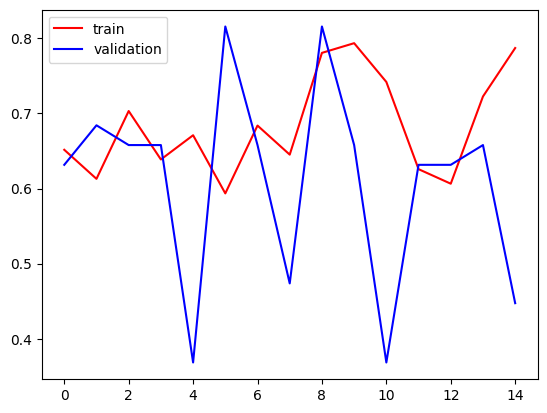

In [ ]:
import matplotlib.pyplot as plt #plotting the results

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

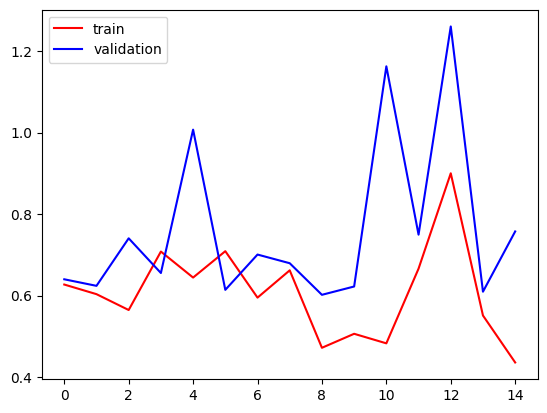

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 51 images belonging to 2 classes.


In [ ]:
# data prediction
predictions = resnet_model.predict(test_data)
print(predictions)

2/2 [==============================] - 17s 7s/step
[[0.1830506 ]
 [0.6950563 ]
 [0.8958511 ]
 [0.6233963 ]
 [0.5480361 ]
 [0.65972   ]
 [0.7365489 ]
 [0.30783886]
 [0.37684193]
 [0.8136019 ]
 [0.3633283 ]
 [0.8857736 ]
 [0.78130394]
 [0.8251584 ]
 [0.62987196]
 [0.64028543]
 [0.32483116]
 [0.89696896]
 [0.78762513]
 [0.675865  ]
 [0.59807587]
 [0.6903022 ]
 [0.43986687]
 [0.52656543]
 [0.8364887 ]
 [0.10258847]
 [0.32265323]
 [0.37977675]
 [0.4080756 ]
 [0.47039726]
 [0.46041542]
 [0.3685467 ]
 [0.29674712]
 [0.57004946]
 [0.37999612]
 [0.535737  ]
 [0.7497839 ]
 [0.6216815 ]
 [0.37500215]
 [0.5512635 ]
 [0.62810373]
 [0.19703816]
 [0.3501598 ]
 [0.7801856 ]
 [0.6391045 ]
 [0.5827297 ]
 [0.5506564 ]
 [0.6141349 ]
 [0.7747653 ]
 [0.14408557]
 [0.49400917]]


In [ ]:
len(predictions)

51

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report


true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # the threshold = 0.5

# Calculation of confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[10 19]
 [10 12]]
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.34      0.41        29
           1       0.39      0.55      0.45        22

    accuracy                           0.43        51
   macro avg       0.44      0.45      0.43        51
weighted avg       0.45      0.43      0.43        51

